# EDA of Project

In [1]:
import os
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.preprocessing import image
%matplotlib inline

train_dir = r'E:\DummyData\Project Eye Detection\dataset_new\train' # image folder


OpenEye = [fn for fn in os.listdir(f'{train_dir}\Open') if fn.endswith('.jpg')] #list of open image
ClosedEye= [fn for fn in os.listdir(f'{train_dir}\Closed') if fn.endswith('.jpg')]#list of closed
print( "Open Eyes Image Dataset ",OpenEye)
print( "Closed Eyes Image Dataset",ClosedEye)
     

Open Eyes Image Dataset  ['_0.jpg', '_1.jpg', '_10.jpg', '_100.jpg', '_101.jpg', '_102.jpg', '_103.jpg', '_104.jpg', '_105.jpg', '_106.jpg', '_108.jpg', '_109.jpg', '_11.jpg', '_110.jpg', '_111.jpg', '_112.jpg', '_113.jpg', '_114.jpg', '_117.jpg', '_118.jpg', '_119.jpg', '_12.jpg', '_121.jpg', '_122.jpg', '_123.jpg', '_124.jpg', '_125.jpg', '_126.jpg', '_127.jpg', '_128.jpg', '_13.jpg', '_131.jpg', '_133.jpg', '_134.jpg', '_135.jpg', '_136.jpg', '_138.jpg', '_139.jpg', '_140.jpg', '_141.jpg', '_142.jpg', '_143.jpg', '_144.jpg', '_145.jpg', '_146.jpg', '_147.jpg', '_149.jpg', '_15.jpg', '_150.jpg', '_151.jpg', '_153.jpg', '_154.jpg', '_155.jpg', '_156.jpg', '_157.jpg', '_158.jpg', '_16.jpg', '_160.jpg', '_162.jpg', '_165.jpg', '_166.jpg', '_17.jpg', '_170.jpg', '_171.jpg', '_173.jpg', '_174.jpg', '_175.jpg', '_176.jpg', '_177.jpg', '_178.jpg', '_179.jpg', '_18.jpg', '_180.jpg', '_182.jpg', '_183.jpg', '_184.jpg', '_185.jpg', '_186.jpg', '_187.jpg', '_188.jpg', '_189.jpg', '_19.jpg', '_1

# Sample Images of Open & Closed Eyes from Dataset

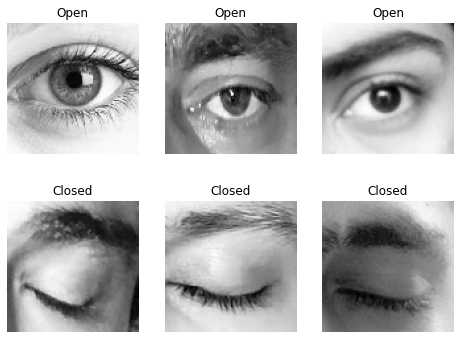

(3, 3)

In [2]:
select_Open = np.random.choice(OpenEye, 3, replace = False)
select_Close = np.random.choice(ClosedEye, 3, replace = False)

#image matrix 2x3
fig = plt.figure(figsize = (8,6))
for i in range(6):
    if i < 3:
        fp = f'{train_dir}\Open/{select_Open[i]}'
        label = 'Open'
    else:
        fp = f'{train_dir}\Closed/{select_Close[i-3]}'
        label = 'Closed'
    ax = fig.add_subplot(2, 3, i+1)
    
    # to plot without rescaling, remove target_size
    fn = image.load_img(fp, target_size = (100,100), color_mode='grayscale')
    plt.imshow(fn, cmap='Greys_r')
    plt.title(label)
    plt.axis('off')
plt.show()

# also check the number of files here
len(select_Open), len(select_Close)

# Processing on images data

In [3]:
def img2np(path, list_of_filename, size = (64, 64)):
    # iterating through each file
    for fn in list_of_filename:
        fp = path + fn
        current_image = image.load_img(fp, target_size = size, 
                                       color_mode = 'grayscale')
        # image to a matrix
        img_ts = image.img_to_array(current_image)
        print("Shape of image:",img_ts.shape)
        # turn that into a vector / 1D array
        img_ts = [img_ts.ravel()]
        print("Converted into 1D array:",img_ts)
        try:
            # concatenate different images
            full_mat = np.concatenate((full_mat, img_ts))
            print("Shape of 1D coverted array:",full_mat.shape)
        except UnboundLocalError: 
            # if not assigned yet, assign one
            full_mat = img_ts
    return full_mat
# run it on our folders
select_OpenEye = img2np(f'{train_dir}\Open/', select_Open)
select_CloseEye = img2np(f'{train_dir}\Closed/', select_Close)


Shape of image: (64, 64, 1)
Converted into 1D array: [array([154., 156., 147., ..., 207., 203., 203.], dtype=float32)]
Shape of image: (64, 64, 1)
Converted into 1D array: [array([162., 166., 154., ..., 140., 138., 136.], dtype=float32)]
Shape of 1D coverted array: (2, 4096)
Shape of image: (64, 64, 1)
Converted into 1D array: [array([230., 230., 229., ..., 190., 185., 178.], dtype=float32)]
Shape of 1D coverted array: (3, 4096)
Shape of image: (64, 64, 1)
Converted into 1D array: [array([177., 177., 178., ...,  63.,  56.,  58.], dtype=float32)]
Shape of image: (64, 64, 1)
Converted into 1D array: [array([174., 174., 174., ..., 134., 132., 128.], dtype=float32)]
Shape of 1D coverted array: (2, 4096)
Shape of image: (64, 64, 1)
Converted into 1D array: [array([142., 142., 146., ..., 191., 191., 184.], dtype=float32)]
Shape of 1D coverted array: (3, 4096)


# Mean of images 

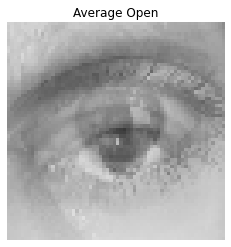

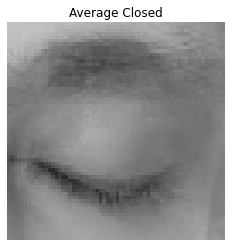

In [4]:
def find_mean_img(full_mat, title, size = (64, 64)):
    # calculate the average
    mean_img = np.mean(full_mat, axis = 0)
    # reshape it back to a matrix
    mean_img = mean_img.reshape(size)
    plt.imshow(mean_img, vmin=0, vmax=255, cmap='Greys_r')
    plt.title(f'Average {title}')
    plt.axis('off')
    plt.show()
    return mean_img

open_mean = find_mean_img(select_OpenEye, 'Open')
close_mean = find_mean_img(select_CloseEye, 'Closed')

# Difference of Open image mean and closed image mean

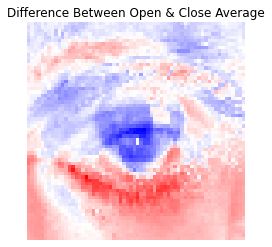

In [5]:
contrast_mean =open_mean - close_mean
plt.imshow(contrast_mean, cmap='bwr')
plt.title(f'Difference Between Open & Close Average')
plt.axis('off')
plt.show()

# PCA

Number of PC:  2


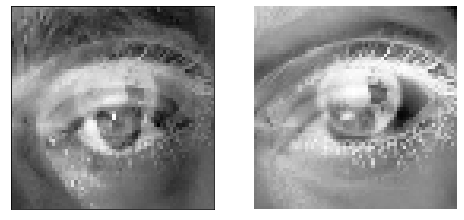

Number of PC:  1


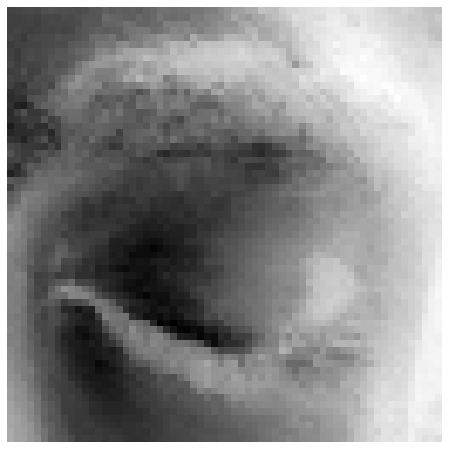

In [6]:
from sklearn.decomposition import PCA
from math import ceil

def eigenimages(full_mat, title, n_comp = 0.7, size = (64, 64)):
    # fit PCA to describe n_comp * variability in the class
    pca = PCA(n_components = n_comp, whiten = True)
    pca.fit(full_mat)
    print('Number of PC: ', pca.n_components_)
    return pca
  
def plot_pca(pca, size = (64, 64)):
    # plot eigenimages in a grid
    n = pca.n_components_
    
    fig = plt.figure(figsize=(8, 8))
    r = int(n**0.5)
    c = ceil(n/ r)
    for i in range(n):
        ax = fig.add_subplot(r, c, i + 1, xticks = [], yticks = [])
        ax.imshow(pca.components_[i].reshape(size), 
                  cmap='Greys_r')
    plt.axis('off')
    plt.show()
    
plot_pca(eigenimages(select_OpenEye, 'Open'))
plot_pca(eigenimages(select_CloseEye, 'Closed'))